<a href="https://colab.research.google.com/github/eman-1111/BlackFridayAnalytics/blob/master/BlackFridayRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**DATA PREPROCESSING**

In [0]:
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]
        

    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list
  
  
def getPurchaseVar(compute_df, purchase_df, var_name):
        grouped_df = purchase_df.groupby(var_name)
        min_dict = {}
        max_dict = {}
        mean_dict = {}
        for name, group in grouped_df:
                min_dict[name] = min(np.array(group["Purchase"]))
                max_dict[name] = max(np.array(group["Purchase"]))
                mean_dict[name] = np.mean(np.array(group["Purchase"]))

        min_list = []
        max_list = []
        mean_list = []
        for index, row in compute_df.iterrows():
                name = row[var_name]
                min_list.append(min_dict.get(name,0))
                max_list.append(max_dict.get(name,0))
                mean_list.append(mean_dict.get(name,0))

        return min_list, max_list, mean_list


In [3]:
import pandas as pd

bfriday = pd.read_csv('./gdrive/My Drive/MUM/BlackFriday.csv')
bfriday.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Preprocessing

ID_col = ['User_ID','Product_ID']
target_col = ['Purchase']
features = list(set(bfriday.columns) - set(target_col))

# Fill missing values with 0
arr = ['Product_Category_2','Product_Category_3']
for e in arr:
    exec("bfriday.%s.fillna(0, inplace=True)" % e)
    
# Encode categorical data
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
#droppedCols = ['User_ID','Product_ID']
#df = bfriday.drop(droppedCols, axis=1)

bfriday[features] = bfriday[features].apply(le.fit_transform)
bfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,670,0,0,10,0,2,0,2,0,0,8370
1,0,2374,0,0,10,0,2,0,0,5,11,15200
2,0,850,0,0,10,0,2,0,11,0,0,1422
3,0,826,0,0,10,0,2,0,11,13,0,1057
4,1,2732,1,6,16,2,4,0,7,0,0,7969


In [0]:
# Normalize the target result

#mean, std = bfriday["Purchase"].mean(), bfriday["Purchase"].std()
#bfriday.loc[:, "Purchase"] = (bfriday["Purchase"] - mean)/std

#bfriday.head()

**SPLIT THE DATA TO TRAIN, VALIDATION AND TEST DATASET**

In [6]:
from sklearn.model_selection import KFold
kf = KFold(4)
for a,b in kf.split(bfriday):
    dTrain, dTest = bfriday.iloc[a], bfriday.iloc[b]
print (dTrain.shape, dTest.shape)

#kf = KFold(4)
#for a,b in kf.split(dTrain_tmp):
#    dTrain, dVal = dTrain_tmp.iloc[a], dTrain_tmp.iloc[b]
#print(dTrain.shape, dVal.shape, dTest.shape)

(403183, 12) (134394, 12)


In [7]:
import numpy as np

print("Getting count features..")
dTrain["Age_Count"] = getCountVar(dTrain, dTrain, "Age")
dTest["Age_Count"] = getCountVar(dTest, dTrain, "Age")
#print "Age", np.unique(dTest["Age_Count"])

dTrain["Occupation_Count"] = getCountVar(dTrain, dTrain, "Occupation")
dTest["Occupation_Count"] = getCountVar(dTest, dTrain, "Occupation")
#    print "Occupation", np.unique(dTest["Occupation_Count"])

dTrain["Product_Category_1_Count"] = getCountVar(dTrain, dTrain, "Product_Category_1")
dTest["Product_Category_1_Count"] = getCountVar(dTest, dTrain, "Product_Category_1")
#    print "Cat 1 ",np.unique(dTest["Product_Category_1_Count"])

dTrain["Product_Category_2_Count"] = getCountVar(dTrain, dTrain, "Product_Category_2")
dTest["Product_Category_2_Count"] = getCountVar(dTest, dTrain, "Product_Category_2")
#    print "Cat 2 ", np.unique(dTest["Product_Category_2_Count"])

dTrain["Product_Category_3_Count"] = getCountVar(dTrain, dTrain, "Product_Category_3")
dTest["Product_Category_3_Count"] = getCountVar(dTest, dTrain, "Product_Category_3")
#    print "Cat 3 ", np.unique(dTest["Product_Category_3_Count"])

dTrain["User_ID_Count"] = getCountVar(dTrain, dTrain, "User_ID")
dTest["User_ID_Count"] = getCountVar(dTest, dTrain, "User_ID")
#    print "User id ", np.unique(dTest["User_ID_Count"])[:10]

dTrain["Product_ID_Count"] = getCountVar(dTrain, dTrain, "Product_ID")
dTest["Product_ID_Count"] = getCountVar(dTest, dTrain, "Product_ID")
#    print "Product id ", np.unique(dTest["Product_ID_Count"])[:10]
min_price_list, max_price_list, mean_price_list = getPurchaseVar(dTrain, dTrain, "User_ID")
dTrain["User_ID_MinPrice"] = min_price_list
dTrain["User_ID_MaxPrice"] = max_price_list
dTrain["User_ID_MeanPrice"] = mean_price_list
min_price_list, max_price_list, mean_price_list = getPurchaseVar(dTest, dTrain, "User_ID")
dTest["User_ID_MinPrice"] = min_price_list
dTest["User_ID_MaxPrice"] = max_price_list
dTest["User_ID_MeanPrice"] = mean_price_list


min_price_list, max_price_list, mean_price_list = getPurchaseVar(dTrain, dTrain, "Product_ID")
dTrain["Product_ID_MinPrice"] = min_price_list
dTrain["Product_ID_MaxPrice"] = max_price_list
dTrain["Product_ID_MeanPrice"] = mean_price_list
min_price_list, max_price_list, mean_price_list = getPurchaseVar(dTest, dTrain, "Product_ID")
dTest["Product_ID_MinPrice"] = min_price_list
dTest["Product_ID_MaxPrice"] = max_price_list
dTest["Product_ID_MeanPrice"] = mean_price_list

Getting count features..


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [0]:
#train_features = dTrain.iloc[:,:-1]
#train_targets = np.array(dTrain.iloc[:,-1])
#test_features = dTest.iloc[:,:-1]
#test_targets = np.array(dTest.iloc[:,-1])
import numpy as np

train_targets = np.array(dTrain["Purchase"])
test_targets = np.array(dTest["Purchase"])
train_features = dTrain.drop(["Purchase"], axis=1)
test_features = dTest.drop(["Purchase"], axis=1)

In [9]:
train_features.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Product_Category_2_Count,Product_Category_3_Count,User_ID_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice
0,0,670,0,0,10,0,2,0,2,0,...,125059,279789,29,155,1057,19219,9665.482759,2648,13716,11871.374194
1,0,2374,0,0,10,0,2,0,0,5,...,12148,13595,29,423,1057,19219,9665.482759,3880,19699,16251.191489
2,0,850,0,0,10,0,2,0,11,0,...,125059,279789,29,79,1057,19219,9665.482759,367,1776,1265.645570
3,0,826,0,0,10,0,2,0,11,13,...,40749,279789,29,242,1057,19219,9665.482759,365,1778,1464.256198
4,1,2732,1,6,16,2,4,0,7,0,...,125059,279789,57,155,3443,20434,10239.824561,3920,10073,7725.612903


**DEEP NEURAL NETWORK**

In [10]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import SGD

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(Dense(10, input_dim=train_features.shape[1], activation= "relu"))
model.add(Dense(10, activation= "relu"))
model.add(Dense(1))

model.compile(loss= "mean_squared_error", optimizer="adam", metrics=["accuracy","mean_squared_error"])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [12]:
train_features.shape

(403183, 24)

In [13]:
#Fit model
history = model.fit(train_features, train_targets, validation_split=0.3, epochs=1000, batch_size=4096)

Train on 282228 samples, validate on 120955 samples
Epoch 1/1000
282228/282228 [==============================] - 3s 10us/step - loss: 1756436563.2589 - acc: 1.0630e-05 - mean_squared_error: 1756436563.2589 - val_loss: 550317349.6682 - val_acc: 2.4803e-05 - val_mean_squared_error: 550317349.6682
Epoch 2/1000
282228/282228 [==============================] - 1s 3us/step - loss: 330330654.8585 - acc: 3.5432e-06 - mean_squared_error: 330330654.8585 - val_loss: 141564942.2475 - val_acc: 4.1338e-05 - val_mean_squared_error: 141564942.2475
Epoch 3/1000
282228/282228 [==============================] - 1s 3us/step - loss: 77251575.3807 - acc: 4.6062e-05 - mean_squared_error: 77251575.3807 - val_loss: 43033727.0792 - val_acc: 8.2675e-05 - val_mean_squared_error: 43033727.0792
Epoch 4/1000
282228/282228 [==============================] - 1s 3us/step - loss: 32618790.5224 - acc: 1.0984e-04 - mean_squared_error: 32618790.5224 - val_loss: 28802735.6952 - val_acc: 1.0748e-04 - val_mean_squared_error:

In [14]:
#Prediction
from sklearn import metrics

predDNN = model.predict(test_features)
mse = metrics.mean_squared_error(test_targets,predDNN)
print("MSE: %.4f" % mse)

print("Accuracy Score of Deep Neural Network on test set %s " % (metrics.r2_score(test_targets, predDNN)*100))

MSE: 6700741.0567
Accuracy Score of Deep Neural Network on test set 73.16968255639833 


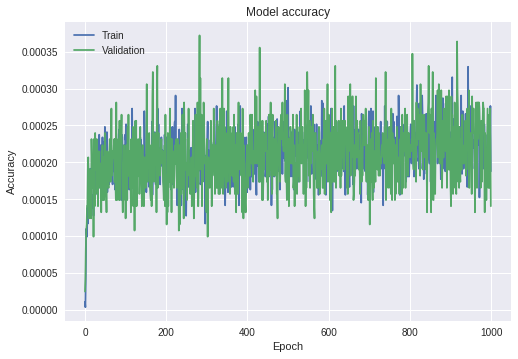

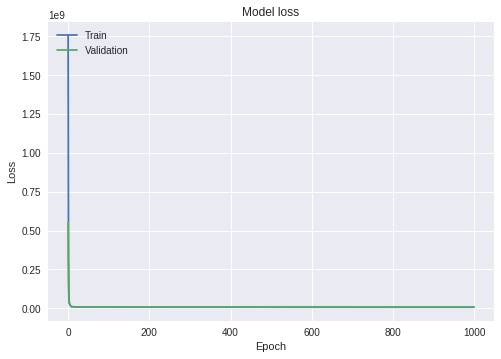

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**RANDOM FOREST**

In [16]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
rfr = RandomForestRegressor()
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
predRF = rfr.predict(test_features) 
print("Accuracy Score of Random Forests on test set %s " % (metrics.r2_score(test_targets, predRF)*100))

Accuracy Score of Random Forests on test set 71.5727483471531 


**GRADIENT BOOSTING**

In [18]:
# Fit regression model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

# Fit regression model
params = {'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
#gbr = ensemble.GradientBoostingRegressor(**params)
gbr = ensemble.GradientBoostingRegressor()

gbr.fit(train_features, train_targets)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [19]:
from sklearn import metrics

predGB = gbr.predict(test_features)
print("Accuracy Score of Gradient Boosting on test set %s " % (metrics.r2_score(test_targets, predGB)*100))

Accuracy Score of Gradient Boosting on test set 73.38803295089966 
